In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.graph_objs as go
import plotly.offline as py
import numpy as np
import seaborn as sns
import random as rd
from wordcloud import WordCloud

from textblob import TextBlob
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer,TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC, LinearSVC
from sklearn.metrics import classification_report, f1_score, accuracy_score, confusion_matrix,recall_score,precision_score,roc_curve
from sklearn.pipeline import Pipeline
# from sklearn import GridSearchCV
from sklearn.model_selection import StratifiedKFold, cross_val_score, train_test_split 
from sklearn.tree import DecisionTreeClassifier 
from sklearn import model_selection,naive_bayes,svm
from sklearn.preprocessing import LabelEncoder

import pandas as pd 
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn import metrics
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, f1_score, accuracy_score, confusion_matrix,recall_score,precision_score,roc_curve

In [3]:
tweets=pd.read_csv('D:\\csit\\6th\\project\\analysis\\process1_tweets.csv',encoding="utf-8")
tweets.head()

,Unnamed: 0,handle,text,is_retweet,retweet_count,favorite_count,sentiment
0,0,HillaryClinton,"['question', 'elect', 'put', 'plan', 'action',...",False,218,651,positive
1,1,HillaryClinton,"['last', 'night', 'donald', 'trump', 'said', '...",True,2445,5308,positive
2,2,HillaryClinton,"['proud', 'vision', 'command', 'last', 'night'...",True,7834,27234,positive
3,3,HillaryClinton,"['stand', 'togeth', 'noth', 'make', 'sure', 'r...",False,916,2542,neutral
4,4,HillaryClinton,"['candid', 'ask', 'confront', 'racial', 'injus...",False,859,2882,negative


In [4]:
analyzer=tweets['text']

In [5]:
bow_transformer = CountVectorizer().fit(tweets['text'])
print(len(bow_transformer.vocabulary_))
print(bow_transformer.get_feature_names()[:5])

5415
['abandon', 'abbott', 'abc', 'abdeslam', 'aberdeen']


In [7]:
messages_bow = bow_transformer.transform(tweets['text'])
print('sparse matrix shape:', messages_bow.shape)
print('number of non-zeros:', messages_bow.nnz)
print('sparsity: %.2f%%' % (100.0 * messages_bow.nnz / (messages_bow.shape[0] * messages_bow.shape[1])))

sparse matrix shape: (6444, 5415)
number of non-zeros: 54872
sparsity: 0.16%


In [8]:
tfidf_transformer = TfidfTransformer().fit(messages_bow)

In [9]:
print (tfidf_transformer.idf_[bow_transformer.vocabulary_['abc']])
print (tfidf_transformer.idf_[bow_transformer.vocabulary_['america']])

7.979300446145233
3.759792740969126


In [10]:
X = tfidf_transformer.transform(messages_bow)
print(X.shape)

(6444, 5415)


In [11]:
# def label_language(tweets) :
#     if tweets["sentiment"] == "positive" :
#         return 4
#     elif tweets["sentiment"]=="negative" :
#         return 5
#     else:
#         return 6
# tweets["sentiment"] = tweets.apply(lambda tweets:label_language(tweets),axis = 1)

In [8]:
vectorizer = TfidfVectorizer(min_df=4, max_features = 10000)
vz = vectorizer.fit_transform(tweets.text)
sentiment=tweets.sentiment

In [9]:

tweets_trump   = (tweets[(tweets["handle"] == "realDonaldTrump")].reset_index()
                  .drop(columns = ["index"],axis = 1))

tweets_hillary  = (tweets[(tweets["handle"] == "HillaryClinton") ].reset_index()
                              .drop(columns = ["index"],axis = 1))
from sklearn.cluster import KMeans

In [10]:
model = KMeans(n_clusters=4, init='k-means++', max_iter=100, n_init=1,random_state=5)

vectorizer = TfidfVectorizer(min_df = 0.05, max_df=0.95,
                             ngram_range=(1, 2), 
                             stop_words='english')
vectorizer.fit(tweets_trump.text)

TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.float64'>, encoding='utf-8',
                input='content', lowercase=True, max_df=0.95, max_features=None,
                min_df=0.05, ngram_range=(1, 2), norm='l2', preprocessor=None,
                smooth_idf=True, stop_words='english', strip_accents=None,
                sublinear_tf=False, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, use_idf=True, vocabulary=None)

In [11]:
msg_train, msg_test, handle_train,handle_test,sentiment_train,sentiment_test = \
    train_test_split(tweets['text'], tweets['handle'],tweets["sentiment"],test_size=0.2, random_state=1)

print(len(msg_train), len(msg_test), len(msg_train) + len(msg_test),len(sentiment_train)+len(sentiment_test))


5155 1289 6444 6444


In [12]:
Encoder = LabelEncoder()
msg_train1 = Encoder.fit_transform(msg_train)
msg_train1= Encoder.fit_transform(msg_test)

In [13]:
Tfidf_vect = TfidfVectorizer(max_features=5000)
Tfidf_vect.fit(tweets['text'])
Train_X_Tfidf = Tfidf_vect.transform(msg_train)
Test_Y_Tfidf = Tfidf_vect.transform(msg_test)


In [14]:
print(Tfidf_vect.vocabulary_)

{'question': 3424, 'elect': 1398, 'put': 3410, 'plan': 3217, 'action': 38, 'make': 2668, 'life': 2600, 'better': 449, 'last': 2554, 'night': 2877, 'donald': 1274, 'trump': 4536, 'said': 3769, 'pay': 3112, 'tax': 4336, 'smart': 4019, 'know': 2528, 'call': 629, 'unpatriot': 4649, 'proud': 3373, 'vision': 4774, 'command': 789, 'debat': 1048, 'show': 3937, 'readi': 3492, 'next': 2871, 'stand': 4134, 'togeth': 4450, 'noth': 2910, 'sure': 4268, 'vote': 4791, 'candid': 643, 'ask': 272, 'confront': 845, 'racial': 3441, 'injust': 2333, 'one': 2975, 'real': 3496, 'answer': 190, 'join': 2473, 'pm': 3236, 'ralli': 3455, 'tomorrow': 4456, 'america': 163, 'center': 688, 'council': 923, 'iowa': 2406, 'ticket': 4428, 'import': 2262, 'sit': 3980, 'go': 1913, 'goe': 1917, 'low': 2642, 'regist': 3555, 'govern': 1940, 'peopl': 3139, 'movement': 2807, 'today': 4447, 'offer': 2959, 'singl': 3974, 'propo': 3364, 'reduc': 3535, 'friction': 1820, 'start': 4140, 'busi': 608, 'week': 4857, 'away': 321, 'check': 

In [15]:
Naive = naive_bayes.MultinomialNB()
Naive.fit(Train_X_Tfidf,sentiment_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [16]:
Nb_predict=Naive.predict(Test_Y_Tfidf)

In [17]:
print(int(accuracy_score(sentiment_test, Nb_predict)*100),"%")

69 %


In [18]:
    NBTrainAccuracy=Naive.score(Train_X_Tfidf,sentiment_train)
    NBTestAccuracy=Naive.score(Test_Y_Tfidf,sentiment_test)
    NBAccuracy=accuracy_score(Nb_predict,sentiment_test)
    NBRecall=recall_score(Nb_predict,sentiment_test,average = "macro")
    NBPrecision=precision_score(Nb_predict,sentiment_test,average = "macro")
    NBF1_score=f1_score(Nb_predict,sentiment_test,average = "macro")

Text(0.5, 1, 'Training Set Confusion Matrix')

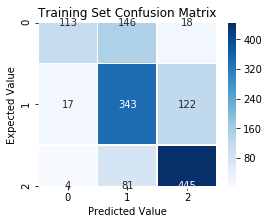

In [19]:
fig, ax = plt.subplots(figsize=(4,3))
confusion_mat=sns.heatmap(confusion_matrix(sentiment_test, Nb_predict), annot=True, linewidths=.5, ax=ax, cmap="Blues", fmt="d").set(xlabel='Predicted Value', ylabel='Expected Value')
plt.title('Training Set Confusion Matrix')

In [20]:
NB_dataset=pd.DataFrame({'handle':handle_test,'PredictSentiment':Nb_predict})

In [21]:
NB_dataset.head()

,handle,PredictSentiment
248,realDonaldTrump,positive
4542,realDonaldTrump,positive
3628,HillaryClinton,positive
3285,HillaryClinton,positive
2403,HillaryClinton,positive


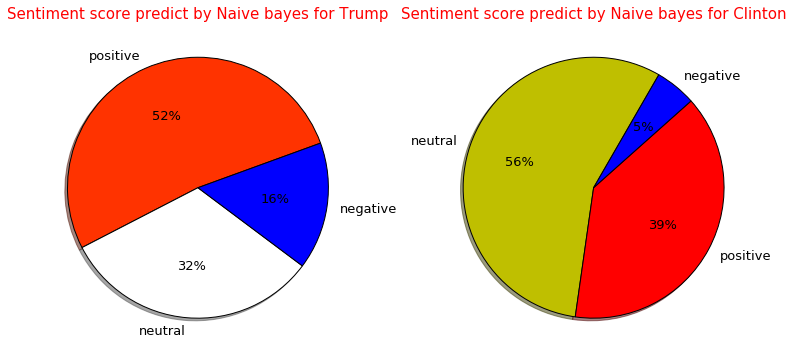

In [22]:
plt.style.use('ggplot')

plt.figure(figsize = (13,6))
plt.subplot(121)
NB_dataset[NB_dataset["handle"] ==
       "realDonaldTrump"]["PredictSentiment"].value_counts().plot.pie(autopct = "%1.0f%%",
                                                                wedgeprops = {"linewidth" : 1,
                                                                              "edgecolor" : "k"},
                                                                shadow = True,fontsize = 13,
#                                                                 explode = [.01,0.04,0.03],
                                                                startangle = 20,
                                                                colors = ["#FF3300","w",'b']
                                                               )
plt.ylabel("")
plt.title("Sentiment score predict by Naive bayes for Trump",fontsize=15,color='r')

plt.subplot(122)
NB_dataset[NB_dataset["handle"] ==
       "HillaryClinton"]["PredictSentiment"].value_counts().plot.pie(autopct = "%1.0f%%",
                                                                wedgeprops = {"linewidth" : 1,
                                                                              "edgecolor" : "k"},
                                                                shadow = True,fontsize = 13,
#                                                                 explode = [.09,0.0],
                                                                startangle = 60,
                                                                colors = ["y","r","b"]
                                                               )
plt.ylabel("")
plt.title("Sentiment score predict by Naive bayes for Clinton",fontsize=15,color='r')
plt.show()

In [23]:
sv=svm.LinearSVC()

In [24]:
sv.fit(Train_X_Tfidf,sentiment_train)

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)

In [25]:
SVM_predict=sv.predict(Test_Y_Tfidf)

In [26]:
print(int(accuracy_score(sentiment_test, SVM_predict)*100),"%")

82 %


In [27]:
SVM_Dataset = pd.DataFrame({'handle':handle_test,'SVM_predict':SVM_predict})

In [28]:
SVM_Dataset.head()

,handle,SVM_predict
248,realDonaldTrump,neutral
4542,realDonaldTrump,positive
3628,HillaryClinton,positive
3285,HillaryClinton,neutral
2403,HillaryClinton,negative


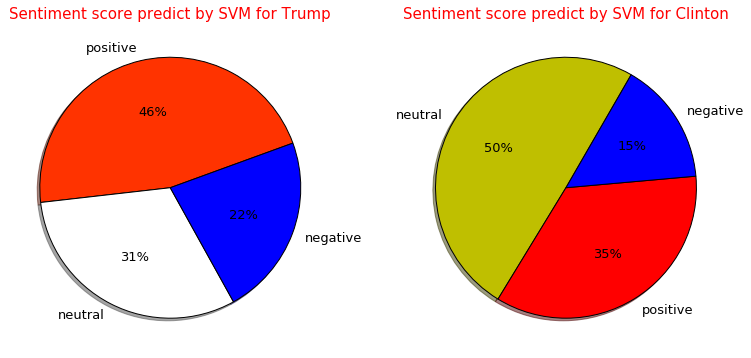

In [29]:
plt.style.use('ggplot')

plt.figure(figsize = (13,6))
plt.subplot(121)
SVM_Dataset[SVM_Dataset["handle"] ==
       "realDonaldTrump"]["SVM_predict"].value_counts().plot.pie(autopct = "%1.0f%%",
                                                                wedgeprops = {"linewidth" : 1,
                                                                              "edgecolor" : "k"},
                                                                shadow = True,fontsize = 13,
                                                                startangle = 20,
                                                                colors = ["#FF3300","w",'b']
                                                               )
plt.ylabel("")
plt.title("Sentiment score predict by SVM for Trump",fontsize=15,color='r')

plt.subplot(122)
SVM_Dataset[SVM_Dataset["handle"] ==
       "HillaryClinton"]["SVM_predict"].value_counts().plot.pie(autopct = "%1.0f%%",
                                                                wedgeprops = {"linewidth" : 1,
                                                                              "edgecolor" : "k"},
                                                                shadow = True,fontsize = 13,

                                                                startangle = 60,
                                                                colors = ["y","r","b"]
                                                               )
plt.ylabel("")
plt.title("Sentiment score predict by SVM for Clinton",fontsize=15,color='r')
plt.show()

Text(0.5, 1, 'Training Set Confusion Matrix Of SVM')

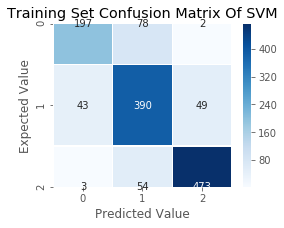

In [30]:
fig, ax = plt.subplots(figsize=(4,3))
confusion_mat=sns.heatmap(confusion_matrix(sentiment_test,SVM_predict ), annot=True, linewidths=.5, ax=ax, cmap="Blues", fmt="d").set(xlabel='Predicted Value', ylabel='Expected Value')
plt.title('Training Set Confusion Matrix Of SVM')

In [31]:
SVMTrainAccuracy=sv.score(Train_X_Tfidf,sentiment_train)
SVMTestAccuracy=sv.score(Test_Y_Tfidf,sentiment_test)
SVMAccuracy=accuracy_score(SVM_predict,sentiment_test)
SVMRecall=recall_score(SVM_predict,sentiment_test,average = "macro")
SVMPrecision=precision_score(SVM_predict,sentiment_test,average = "macro")
SVMF1_score=f1_score(SVM_predict,sentiment_test,average = "macro")

In [32]:
vectorizer = TfidfVectorizer(min_df = 0.05, max_df=0.95,
                             ngram_range=(1, 2), 
                             stop_words='english')
vectorizer.fit(tweets_trump.text)
trump_vz=vectorizer.transform(tweets_trump.text)
clinton_vz=vectorizer.transform(tweets_hillary.text)

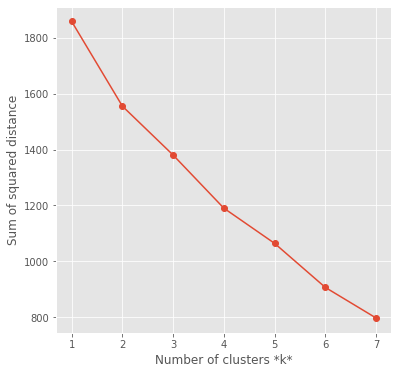

In [33]:
sse = []
list_k = list(range(1,8))

for k in list_k:
    km = KMeans(n_clusters=k)
    km.fit(trump_vz)
    sse.append(km.inertia_)

# Plot sse against k
plt.figure(figsize=(6, 6))
plt.plot(list_k, sse, '-o')
plt.xlabel(r'Number of clusters *k*')
plt.ylabel('Sum of squared distance')
plt.show()

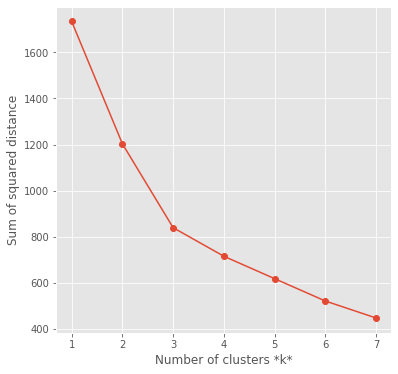

In [34]:
sse = []
list_k = list(range(1,8))

for k in list_k:
    km = KMeans(n_clusters=k)
    km.fit(clinton_vz)
    sse.append(km.inertia_)

# Plot sse against k
plt.figure(figsize=(6, 6))
plt.plot(list_k, sse, '-o')
plt.xlabel(r'Number of clusters *k*')
plt.ylabel('Sum of squared distance')
plt.show()

In [35]:
from sklearn.cluster import KMeans
num_clusters = 3
kmeans_model_trump = KMeans(n_clusters=num_clusters, n_init=1, 
                         verbose=False, max_iter=1000)
kmeans_trump = kmeans_model_trump.fit(trump_vz,tweets_trump.sentiment)
kmeans_clusters = kmeans_trump.predict(trump_vz)
kmeans_distances = kmeans_trump.transform(trump_vz)
sorted_centroids = kmeans_trump.cluster_centers_.argsort()
terms = vectorizer.get_feature_names()
for i in range(num_clusters):
    print("Cluster %d:" % i)
    for j in sorted_centroids[i, :5]:
        print(' %s' % terms[j])
    print()

Cluster 0:
 crook hillari
 new
 crook
 hillari
 clinton

Cluster 1:
 crook
 crook hillari
 clinton
 hillari
 vote

Cluster 2:
 thank
 new
 great
 cruz
 america



In [36]:
import sklearn.metrics as sm

In [37]:
tweets_trump['cluster'] = kmeans_model_trump.labels_
tweets_trump.groupby('cluster').count()


,Unnamed: 0,handle,text,is_retweet,retweet_count,favorite_count,sentiment
cluster,,,,,,,
0,2667,2667,2667,2667,2667,2667,2667
1,173,173,173,173,173,173,173
2,378,378,378,378,378,378,378


In [38]:
tweets_trump.groupby('cluster').sum()

,Unnamed: 0,is_retweet,retweet_count,favorite_count
cluster,,,,
0,11294167,112.0,14122299,40974101
1,818421,4.0,766330,2239901
2,1095636,9.0,3815085,10248637


In [39]:
tweets_trump['predict_cluster']=kmeans_model_trump.fit_predict(trump_vz)
tweets_trump.groupby('predict_cluster').count()

,Unnamed: 0,handle,text,is_retweet,retweet_count,favorite_count,sentiment,cluster
predict_cluster,,,,,,,,
0,592,592,592,592,592,592,592,592
1,2203,2203,2203,2203,2203,2203,2203,2203
2,423,423,423,423,423,423,423,423


In [40]:
tweets_trump[tweets_trump["sentiment"] ==
       "positive"]["predict_cluster"].value_counts()

1    865
2    392
0    153
Name: predict_cluster, dtype: int64

In [41]:
tweets_trump[tweets_trump["sentiment"] ==
       "negative"]["predict_cluster"].value_counts()

1    499
0    256
2     14
Name: predict_cluster, dtype: int64

In [42]:
tweets_trump[tweets_trump["sentiment"] ==
       "neutral"]["predict_cluster"].value_counts()

1    839
0    183
2     17
Name: predict_cluster, dtype: int64

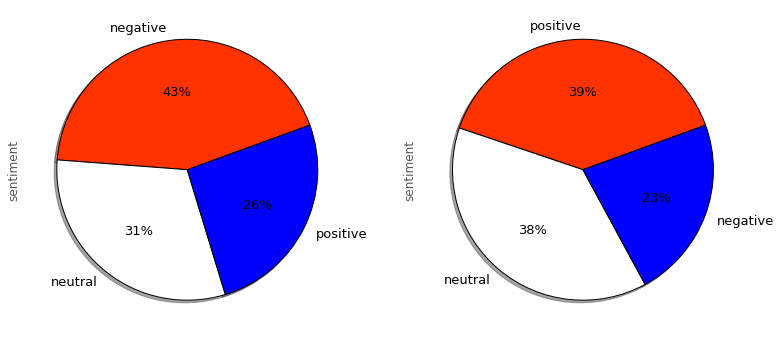

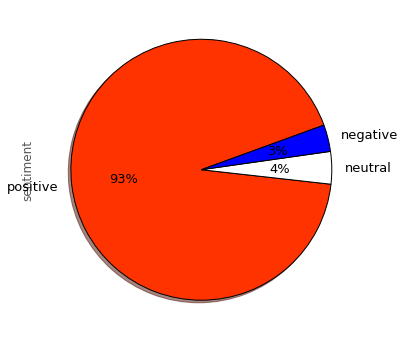

In [43]:
plt.style.use('ggplot')

plt.figure(figsize = (13,6))
plt.subplot(121)
tweets_trump[tweets_trump["predict_cluster"] ==
       0]["sentiment"].value_counts().plot.pie(autopct = "%1.0f%%",
                                                                wedgeprops = {"linewidth" : 1,
                                                                              "edgecolor" : "k"},
                                                                shadow = True,fontsize = 13,
                                                                startangle = 20,
                                                                colors = ["#FF3300","w",'b']
                                                               )
plt.subplot(122)
tweets_trump[tweets_trump["predict_cluster"] ==
       1]["sentiment"].value_counts().plot.pie(autopct = "%1.0f%%",
                                                                wedgeprops = {"linewidth" : 1,
                                                                              "edgecolor" : "k"},
                                                                shadow = True,fontsize = 13,
                                                                startangle = 20,
                                                                colors = ["#FF3300","w",'b']
                                                               )
plt.figure(figsize = (13,6))
plt.subplot(122)
tweets_trump[tweets_trump["predict_cluster"] ==
       2]["sentiment"].value_counts().plot.pie(autopct = "%1.0f%%",
                                                                wedgeprops = {"linewidth" : 1,
                                                                              "edgecolor" : "k"},
                                                                shadow = True,fontsize = 13,
                                                                startangle = 20,
                                                                colors = ["#FF3300","w",'b']
                                                               )
plt.show()

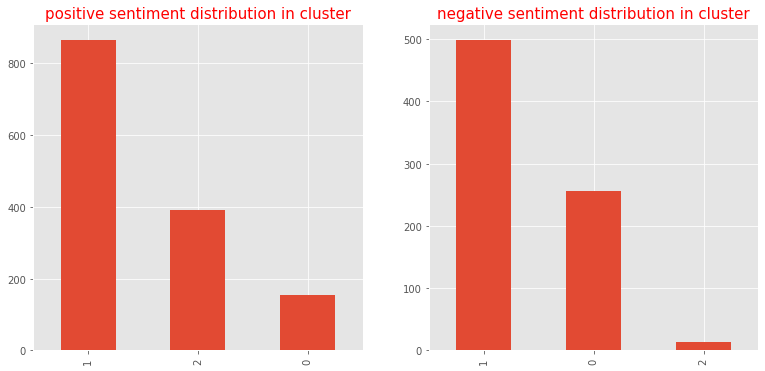

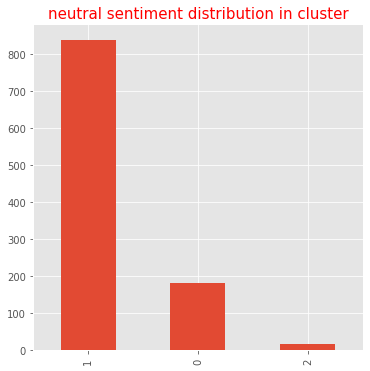

In [44]:
plt.style.use('ggplot')

plt.figure(figsize = (13,6))
plt.subplot(121)
tweets_trump[tweets_trump["sentiment"] ==
       "positive"]["predict_cluster"].value_counts().plot.bar()
plt.ylabel("")
plt.title("positive sentiment distribution in cluster",fontsize=15,color='r')
plt.subplot(122)
tweets_trump[tweets_trump["sentiment"] ==
       "negative"]["predict_cluster"].value_counts().plot.bar()
                                                               
plt.ylabel("")
plt.title("negative sentiment distribution in cluster",fontsize=15,color='r')

plt.figure(figsize = (13,6))
plt.subplot(121)
tweets_trump[tweets_trump["sentiment"] ==
      "neutral"]["predict_cluster"].value_counts().plot.bar()

plt.ylabel("")
plt.title("neutral sentiment distribution in cluster",fontsize=15,color='r')
plt.show()

In [45]:
from sklearn.cluster import KMeans
clinton_vz=vectorizer.transform(tweets_hillary.text)
num_clusters = 3
kmeans_model_clinton = KMeans(n_clusters=num_clusters, n_init=1, 
                         verbose=False, max_iter=1000)
kmeans_clinton = kmeans_model_clinton.fit(clinton_vz)
kmeans_clusters = kmeans_clinton.predict(trump_vz)
kmeans_distances_clinton = kmeans_clinton.transform(trump_vz)
sorted_centroids_clinton = kmeans_clinton.cluster_centers_.argsort()
terms = vectorizer.get_feature_names()
for i in range(num_clusters):
    print("Cluster %d:" % i)
    for j in sorted_centroids[i, :5]:
        print(' %s' % terms[j])
    print()

Cluster 0:
 crook hillari
 new
 crook
 hillari
 clinton

Cluster 1:
 crook
 crook hillari
 clinton
 hillari
 vote

Cluster 2:
 thank
 new
 great
 cruz
 america



In [46]:
tweets_hillary['cluster'] = kmeans_model_clinton.labels_
tweets_hillary.groupby('cluster').count()

,Unnamed: 0,handle,text,is_retweet,retweet_count,favorite_count,sentiment
cluster,,,,,,,
0,1708,1708,1708,1708,1708,1708,1708
1,740,740,740,740,740,740,740
2,778,778,778,778,778,778,778


In [47]:
tweets_hillary['predict_cluster']=kmeans_model_clinton.fit_predict(clinton_vz)
tweets_hillary.groupby('predict_cluster').count()

,Unnamed: 0,handle,text,is_retweet,retweet_count,favorite_count,sentiment,cluster
predict_cluster,,,,,,,,
0,740,740,740,740,740,740,740,740
1,1708,1708,1708,1708,1708,1708,1708,1708
2,778,778,778,778,778,778,778,778


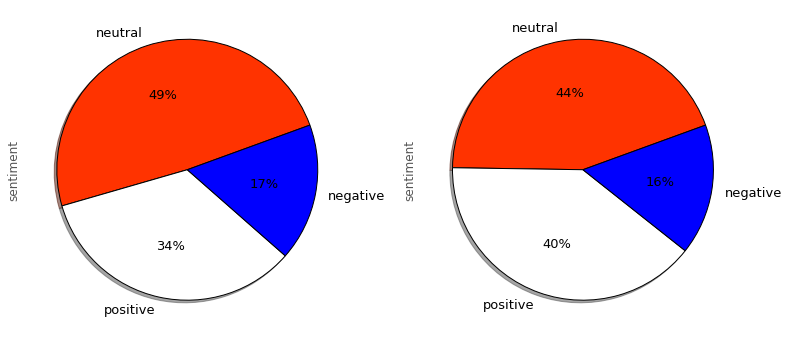

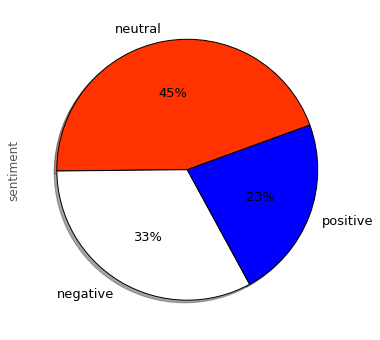

In [48]:
plt.style.use('ggplot')

plt.figure(figsize = (13,6))
plt.subplot(121)
tweets_hillary[tweets_hillary["predict_cluster"] ==
       0]["sentiment"].value_counts().plot.pie(autopct = "%1.0f%%",
                                                                wedgeprops = {"linewidth" : 1,
                                                                              "edgecolor" : "k"},
                                                                shadow = True,fontsize = 13,
                                                                startangle = 20,
                                                                colors = ["#FF3300","w",'b']
                                                               )
plt.subplot(122)
tweets_hillary[tweets_hillary["predict_cluster"] ==
       1]["sentiment"].value_counts().plot.pie(autopct = "%1.0f%%",
                                                                wedgeprops = {"linewidth" : 1,
                                                                              "edgecolor" : "k"},
                                                                shadow = True,fontsize = 13,
                                                                startangle = 20,
                                                                colors = ["#FF3300","w",'b']
                                                               )
plt.figure(figsize = (13,6))
plt.subplot(122)
tweets_hillary[tweets_hillary["predict_cluster"] ==
       2]["sentiment"].value_counts().plot.pie(autopct = "%1.0f%%",
                                                                wedgeprops = {"linewidth" : 1,
                                                                              "edgecolor" : "k"},
                                                                shadow = True,fontsize = 13,
                                                                startangle = 20,
                                                                colors = ["#FF3300","w",'b']
                                                               )
plt.show()

In [49]:
print(confusion_matrix(tweets_trump["predict_cluster"],tweets_trump["cluster"]))

[[ 366   17  209]
 [1914  125  164]
 [ 387   31    5]]


Text(0.5, 1, 'Confusion Matrix of K-means for Trump tweets')

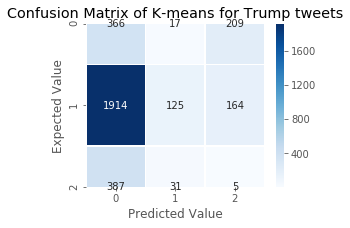

In [50]:
fig, ax = plt.subplots(figsize=(4,3))
confusion_mat=sns.heatmap(confusion_matrix(tweets_trump["predict_cluster"],tweets_trump["cluster"]), annot=True, linewidths=.5, ax=ax, cmap="Blues", fmt="d").set(xlabel='Predicted Value', ylabel='Expected Value')
plt.title('Confusion Matrix of K-means for Trump tweets')

In [57]:
tweets_hillary[tweets_hillary["sentiment"] ==
       "positive"]["predict_cluster"].value_counts()

2    676
0    237
1    191
Name: predict_cluster, dtype: int64

In [51]:
tweets_hillary[tweets_hillary["sentiment"] ==
       "negative"]["predict_cluster"].value_counts()

1    277
2    255
0    126
Name: predict_cluster, dtype: int64

In [52]:
tweets_hillary[tweets_hillary["sentiment"] ==
       "neutral"]["predict_cluster"].value_counts()

1    755
0    362
2    347
Name: predict_cluster, dtype: int64

In [58]:
print(confusion_matrix(tweets_hillary["predict_cluster"],tweets_hillary["cluster"]))

[[   0  740    0]
 [1708    0    0]
 [   0    0  778]]


Text(0.5, 1, 'Confusion Matrix of K-means for Clinton Tweets')

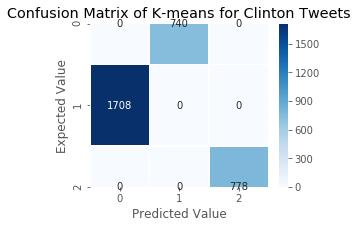

In [59]:
fig, ax = plt.subplots(figsize=(4,3))
confusion_mat=sns.heatmap(confusion_matrix(tweets_hillary["predict_cluster"],tweets_hillary["cluster"]), annot=True, linewidths=.5, ax=ax, cmap="Blues", fmt="d").set(xlabel='Predicted Value', ylabel='Expected Value')
plt.title('Confusion Matrix of K-means for Clinton Tweets')

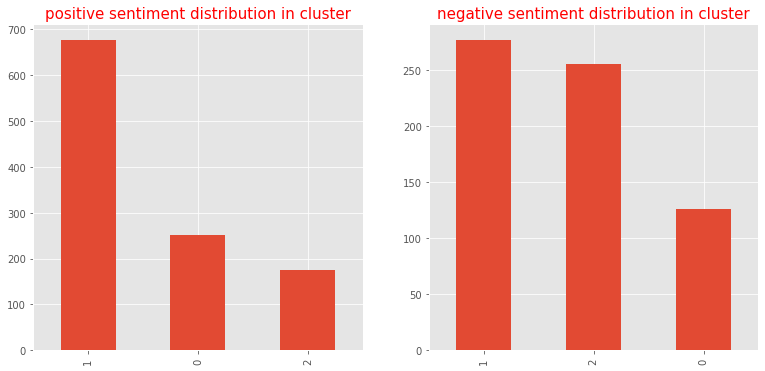

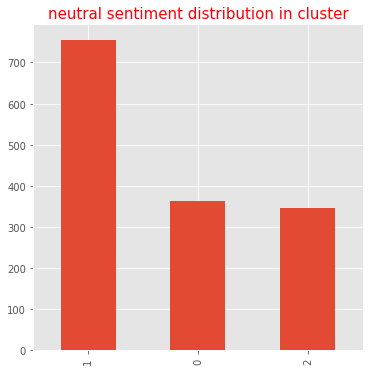

In [53]:
plt.style.use('ggplot')

plt.figure(figsize = (13,6))
plt.subplot(121)
tweets_hillary[tweets_hillary["sentiment"] ==
       "positive"]["predict_cluster"].value_counts().plot.bar()
plt.ylabel("")
plt.title("positive sentiment distribution in cluster",fontsize=15,color='r')
plt.subplot(122)
tweets_hillary[tweets_hillary["sentiment"] ==
       "negative"]["predict_cluster"].value_counts().plot.bar()
                                                               
plt.ylabel("")
plt.title("negative sentiment distribution in cluster",fontsize=15,color='r')

plt.figure(figsize = (13,6))
plt.subplot(121)
tweets_hillary[tweets_hillary["sentiment"] ==
      "neutral"]["predict_cluster"].value_counts().plot.bar()

plt.ylabel("")
plt.title("neutral sentiment distribution in cluster",fontsize=15,color='r')
plt.show()

In [54]:
KMeansAccuracy=(accuracy_score(tweets_hillary["predict_cluster"],tweets_hillary["cluster"])+accuracy_score(tweets_trump["predict_cluster"],tweets_trump["cluster"]))/2
KMeansRecall=(recall_score(tweets_hillary["predict_cluster"],tweets_hillary["cluster"],average = "macro")+recall_score(tweets_trump["predict_cluster"],tweets_trump["cluster"],average = "macro"))/2
KMeansPrecision=(precision_score(tweets_hillary["predict_cluster"],tweets_hillary["cluster"],average = "macro")+precision_score(tweets_trump["predict_cluster"],tweets_trump["cluster"],average = "macro"))/2
KMeansF1_score=(f1_score(tweets_hillary["predict_cluster"],tweets_hillary["cluster"],average = "macro")+f1_score(tweets_trump["predict_cluster"],tweets_trump["cluster"],average = "macro"))/2

In [56]:
data = [['NB',NBAccuracy,NBRecall,NBPrecision,NBF1_score,NBTrainAccuracy,NBTestAccuracy], ['SVM',SVMAccuracy,SVMRecall,SVMPrecision,SVMF1_score,SVMTrainAccuracy,SVMTestAccuracy],['K-Mean',KMeansAccuracy,KMeansPrecision,KMeansF1_score]]
df = pd.DataFrame(data,columns = ['Name', 'accuracy','recall','precision','F1','TrainAccuracy','TestAccuracy']) 

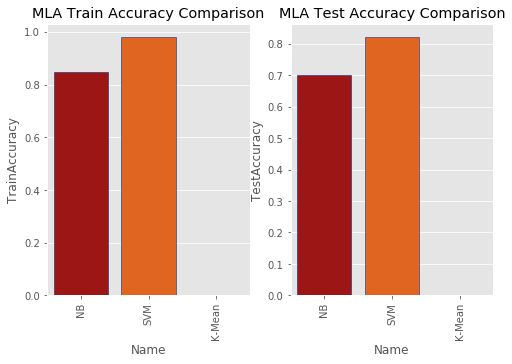

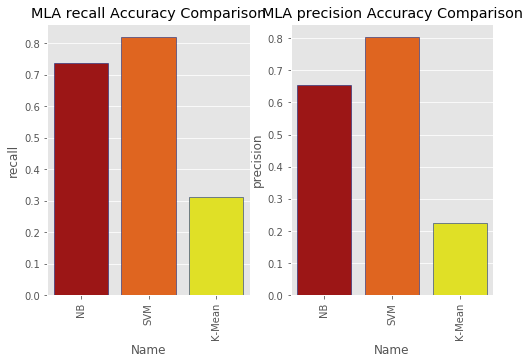

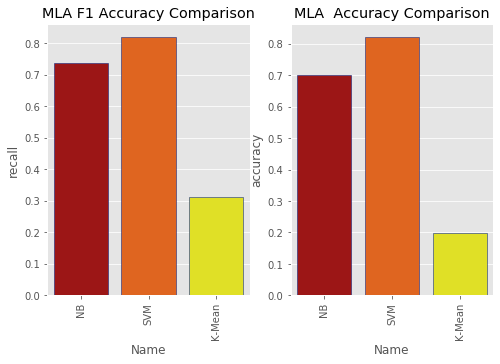

In [57]:
plt.style.use('ggplot')

plt.figure(figsize = (8,5))
plt.subplot(121)

sns.barplot(x="Name", y="TrainAccuracy",data=df,palette='hot',edgecolor=sns.color_palette('dark',1))
plt.xticks(rotation=90)
plt.title('MLA Train Accuracy Comparison')

plt.subplot(122)
sns.barplot(x="Name", y="TestAccuracy",data=df,palette='hot',edgecolor=sns.color_palette('dark',1))
plt.xticks(rotation=90)
plt.title('MLA Test Accuracy Comparison')
plt.show()


plt.figure(figsize = (8,5))
plt.subplot(121)
sns.barplot(x="Name", y="recall",data=df,palette='hot',edgecolor=sns.color_palette('dark',1))
plt.xticks(rotation=90)
plt.title('MLA recall Accuracy Comparison')

plt.subplot(122)
sns.barplot(x="Name", y="precision",data=df,palette='hot',edgecolor=sns.color_palette('dark',1))
plt.xticks(rotation=90)
plt.title('MLA precision Accuracy Comparison')
plt.show()

plt.figure(figsize = (8,5))
plt.subplot(121)
sns.barplot(x="Name", y="recall",data=df,palette='hot',edgecolor=sns.color_palette('dark',1))
plt.xticks(rotation=90)
plt.title('MLA F1 Accuracy Comparison')

plt.subplot(122)
sns.barplot(x="Name", y="accuracy",data=df,palette='hot',edgecolor=sns.color_palette('dark',1))
plt.xticks(rotation=90)
plt.title('MLA  Accuracy Comparison')
plt.show()
